In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
from numpy import cos, sin
%matplotlib inline

from nsmod.one_component_model_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

AnomTorque : 1.0000000000e+00
Bs : 1.3416407865e+14
DeltaPhi_49 : 1.7172104679e-03
DeltaPhi_49_SpindownTorque : 1.0715025101e-05
DeltaPhi_63 : 2.3950320849e-02
DeltaPhi_75 : 1.7214371745e-02
EMtorqueAmplificationfactor : 4.3816499746e+01
P : 1.0005072145e-03
T : 3.3000000000e+02
a0 : 4.0000000000e+00
beta : -6.9937225144e-04
chi0 : 8.8600000000e+01
delta_omega_dot0_EM : 4.3798229347e-03
delta_omega_dot0_FP : 6.7289684737e-06
delta_omega_dot0_FP_EM : 9.3850437638e-05
epsA : 5.0000000000e-09
epsI1 : 0.0000000000e+00
epsI3 : 1.0000000000e-05
n : 1.0000000000e+05
nu_dot0 : -4.3772084811e-03
omega0 : 6.2800000000e+03
omega_dot0 : -2.7502812015e-02
source_script : one-component-model-with-Euler
tauA : 2.0010144290e+05
tauE : 2.2834028741e+05
tauP : 1.0005072145e+02
tauS : 2.2820398393e+05
wobble_angle : 7.0263807521e-02
wobble_angle_spindown : 4.3843109237e-04
T4 0.0177127051073 0.00144754197883
0.0
0.00431638796276
0.00885635255364
3.60148149206e-05
1.84925761838e-06
2.79037386746e-09


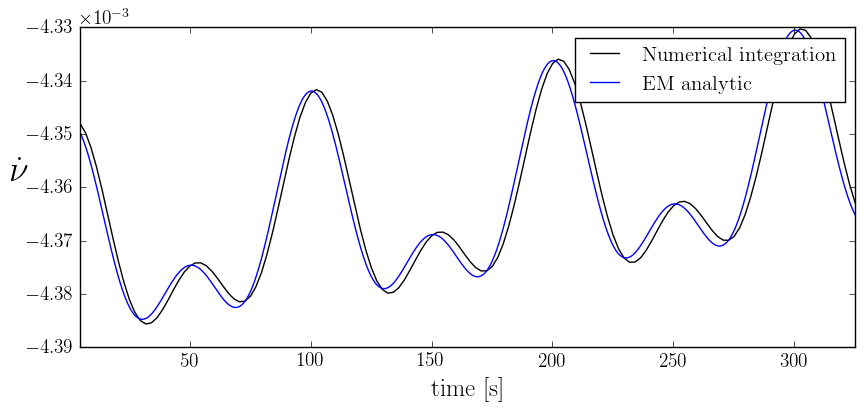

In [32]:
from numpy import sin, cos, pi
def SignalModelWithGeometric(params, t, geometric=0):
    omega0, epsI, a0, chi, epsA = params

    theta = a0

    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA
    tauS = 1.0/(k * omega0**2)
    tauP = 2*pi/(epsI * omega0)
    psi0 = pi/2

    psi = psi0 + 2*pi * (-t/tauP + sin(chi)**2 * t**2 / (2*tauS * tauP))

    C = 1 - (cos(theta)*cos(chi))**2 - 0.5*(sin(theta)*sin(chi))**2

    f = sin(2*theta)*sin(2*chi)*sin(psi) - (sin(theta)*sin(chi))**2*cos(2*psi)

    g = (sin(2*theta)*sin(2*chi)*sin(2*pi*t/tauP - psi0) - 
         (sin(theta)*sin(chi))**2*cos(4*pi*t/tauP + 2*psi0))

    T0 = omega0 / tauS
    T1 = -C
    T2 =  3*C**2 * t/tauS
    T3 = 0.5*f
    T4 = -1.5*C*f*t/tauS
    T5 = -(.75/pi)*g*C*tauP/tauS
    T6 = 3/(pi*8.)* g*f*tauP/tauS

    theta = a0
    psidot = -epsI*omega0
    EM = T0 * (T1 + T2 + T3 + T4 + T5 + T6
              )
    GEOMETRIC = psidot**2 * (theta * cos(chi)/sin(chi) * cos(psi) + 
                             .5*theta**2*(3+cos(2*chi))/(sin(chi))* sin(2*psi)
                             )

    print "T4", np.max(f) - np.min(f), t[-1]/tauS
    for T in [T1, T2, T3, T4, T5, T6]:
        print abs(np.max(T) - np.min(T))
    return  (EM +  geometric * GEOMETRIC)/(2*pi)

fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameter3
epsI3 = 1e-5
omega0 = 2*np.pi*1000
epsA = 5e-9
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 3.3* tauP
a0 = 4.0

n = 100000
error = 1e-13

# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, 
                 cleanup=False, 
                 #DryRun=True, 
                 AnomTorque=True)

File_Functions.PrintParameterDictionary(file_name)

ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="", divisor=11, label="Numerical integration")

time = np.linspace(0, T, 1000)

PD = File_Functions.Parameter_Dictionary(file_name)
nu_dot0 = PD['nu_dot0']

# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModelWithGeometric(theta_EM, time), color="b", label="EM analytic")

plt.legend()
plt.show()
